# Model Building 

### Importing the neccesary libraries 

In [3]:
import numpy as np
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from keras.optimizers import Adam 
from keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix



### Importing the training and testing data , and making the necessary transformations 

In [4]:
train_dir = 'C:/Users/New_User/Downloads/deep_learning/train'
val_dir = 'C:/Users/New_User/Downloads/deep_learning/test'
train_trans = ImageDataGenerator(rescale=1./255)
val_trans = ImageDataGenerator(rescale=1./255)
train_generator = train_trans.flow_from_directory (
    train_dir,
    target_size = (48,48),
    batch_size = 64, #number of training examples in 1 iteration
    color_mode = "grayscale", #images are in black and white
    class_mode = 'categorical') #angry , happy ....
validation_generator = val_trans.flow_from_directory(
    val_dir,
    target_size = (48,48),
    batch_size = 64,
    color_mode = "grayscale",
    class_mode = 'categorical')



Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


### Building the model

In [5]:
emotion_model = Sequential() #layer by layer
emotion_model.add(Conv2D(32 , kernel_size = (3,3), activation = 'relu', input_shape=(48,48,1)))
emotion_model.add(Conv2D(64 , kernel_size = (3,3), activation = 'relu'))
emotion_model.add(MaxPooling2D(pool_size=(2,2))) 
emotion_model.add(Dropout(0.25)) 
emotion_model.add(Conv2D(128 , kernel_size = (3,3), activation = 'relu'))
emotion_model.add(MaxPooling2D(pool_size = (2,2)))
emotion_model.add(Conv2D(128 , kernel_size = (3,3), activation = 'relu'))
emotion_model.add(MaxPooling2D(pool_size = (2,2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.25))
emotion_model.add(Dense(7, activation='softmax'))



C:\Users\New_User\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Training the model

In [7]:
emotion_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
emotion_model_info = emotion_model.fit(
    train_generator,
    steps_per_epoch = 28709 // 64,
    epochs = 50,
    validation_data=validation_generator,
    validation_steps = 7178 // 64
)
emotion_model.save_weights('model.weights.h5')

Epoch 1/50


C:\Users\New_User\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


448/448 ━━━━━━━━━━━━━━━━━━━━ 136s 297ms/step - accuracy: 0.2470 - loss: 1.8186 - val_accuracy: 0.3705 - val_loss: 1.6542
Epoch 2/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 165us/step - accuracy: 0.3906 - loss: 1.5616 - val_accuracy: 0.4000 - val_loss: 2.1192
Epoch 3/50


C:\Users\New_User\anaconda3\lib\contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


448/448 ━━━━━━━━━━━━━━━━━━━━ 138s 308ms/step - accuracy: 0.3700 - loss: 1.6237 - val_accuracy: 0.4143 - val_loss: 1.5350
Epoch 4/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 82us/step - accuracy: 0.3906 - loss: 1.5523 - val_accuracy: 0.4000 - val_loss: 1.5949
Epoch 5/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 142s 316ms/step - accuracy: 0.4146 - loss: 1.5327 - val_accuracy: 0.4450 - val_loss: 1.4590
Epoch 6/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 111us/step - accuracy: 0.4844 - loss: 1.3751 - val_accuracy: 0.4000 - val_loss: 1.5932
Epoch 7/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 176s 392ms/step - accuracy: 0.4427 - loss: 1.4573 - val_accuracy: 0.4703 - val_loss: 1.3992
Epoch 8/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 112us/step - accuracy: 0.4375 - loss: 1.4328 - val_accuracy: 0.5000 - val_loss: 1.4987
Epoch 9/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 160s 356ms/step - accuracy: 0.4716 - loss: 1.3950 - val_accuracy: 0.4809 - val_loss: 1.3535
Epoch 10/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 79us/step - accuracy: 0.5625 - loss: 1.2770 - val_

### redifining the model and loading the weights 

In [8]:
# Redefine the model architecture
emotion_model = Sequential()
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.25))
emotion_model.add(Dense(7, activation='softmax'))

# Compile the model
emotion_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])


In [9]:
# Load the weights into the model
emotion_model.load_weights('model.weights.h5')

# Get information about the model
emotion_model.summary()


C:\Users\New_User\anaconda3\lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 44, 44, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │         7,175 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,345,607 (8.95 MB)

 Trainable params: 2,345,607 (8.95 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Evaluate the model on the validation set
loss, accuracy = emotion_model.evaluate(validation_generator)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

# Get the ground truth labels and the predicted labels
validation_generator.reset()  # Reset the generator for accurate predictions
Y_pred = emotion_model.predict(validation_generator, validation_generator.samples // validation_generator.batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)

# Get the true labels from the generator
y_true = validation_generator.classes

# Class labels
class_labels = list(validation_generator.class_indices.keys())

# Print classification report
print(classification_report(y_true, y_pred, target_names=class_labels))

# Print confusion matrix
cm = confusion_matrix(y_true, y_pred)
print(cm)



113/113 ━━━━━━━━━━━━━━━━━━━━ 10s 82ms/step - accuracy: 0.6096 - loss: 1.0968
Test Loss: 1.106584906578064
Test Accuracy: 0.6062970161437988
113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step
              precision    recall  f1-score   support

       angry       0.14      0.13      0.13       958
     disgust       0.01      0.01      0.01       111
        fear       0.15      0.12      0.13      1024
       happy       0.26      0.27      0.26      1774
     neutral       0.18      0.16      0.17      1233
         sad       0.18      0.24      0.21      1247
    surprise       0.11      0.11      0.11       831

    accuracy                           0.18      7178
   macro avg       0.15      0.15      0.15      7178
weighted avg       0.18      0.18      0.18      7178

[[122   8 111 248 143 232  94]
 [ 14   1   7  34  25  17  13]
 [116   8 120 263 161 225 131]
 [234  16 181 475 265 405 198]
 [143  11 143 312 201 285 138]
 [157  19 142 296 177 298 158]
 [ 92   4 111 209 125 196  94]]


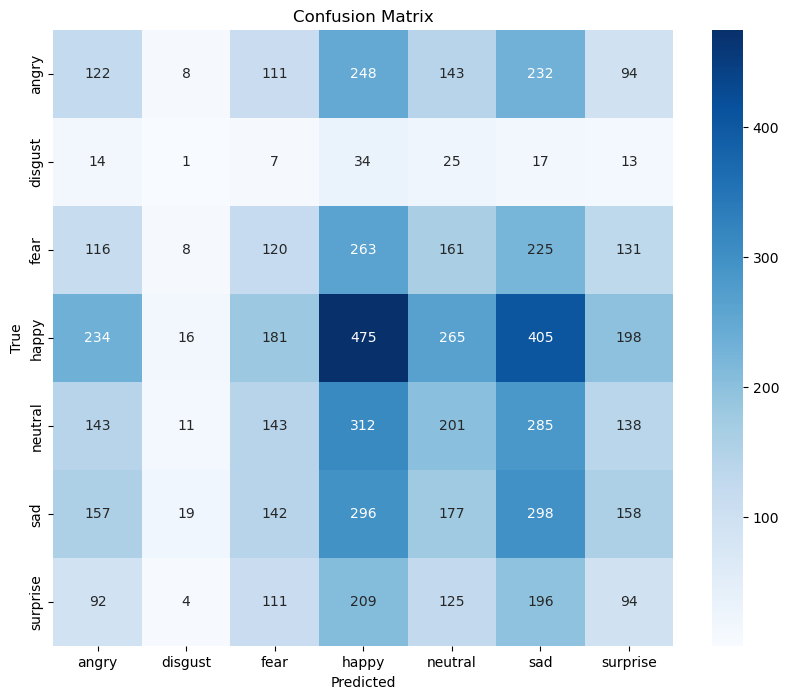

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


<Figure size 1000x800 with 0 Axes>

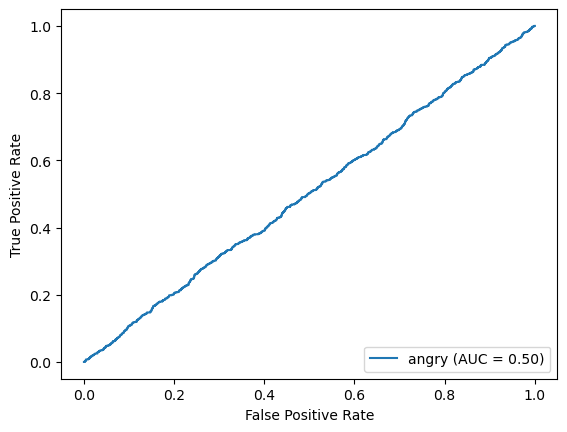

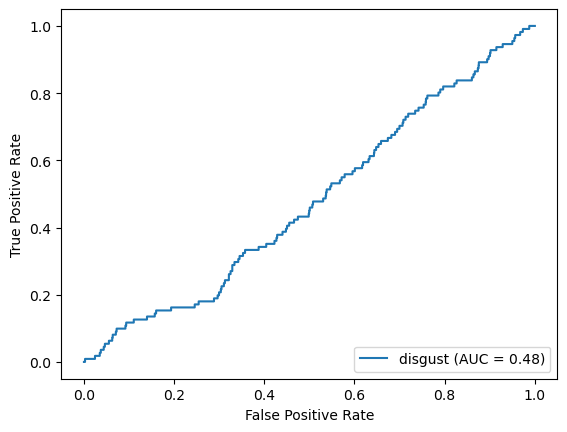

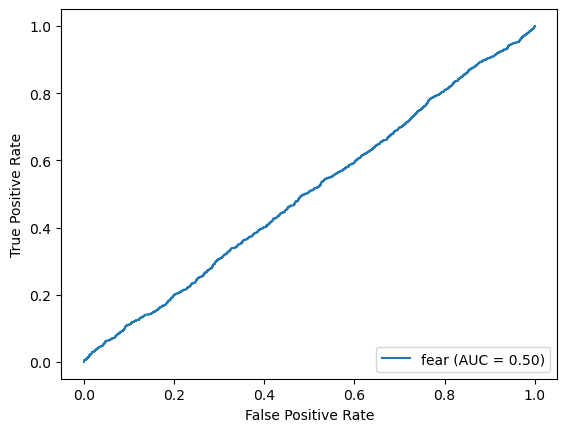

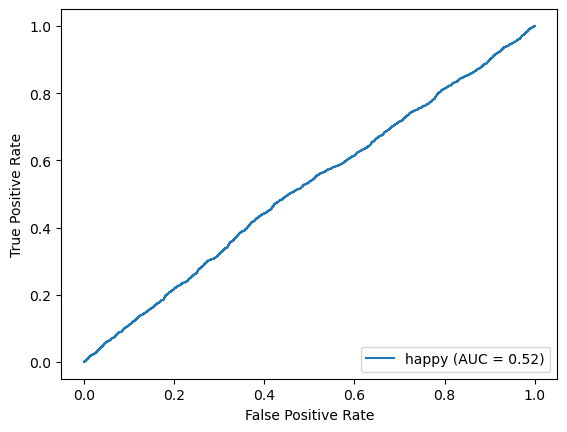

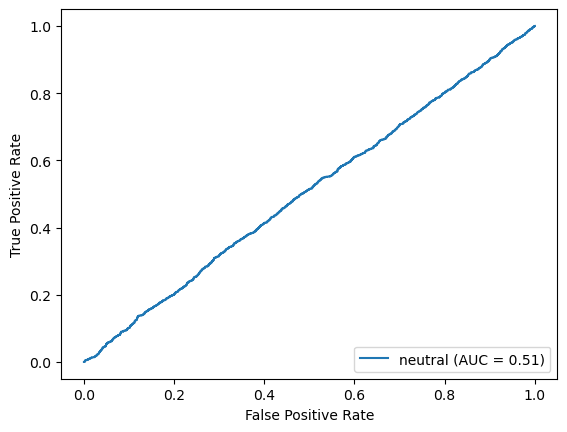

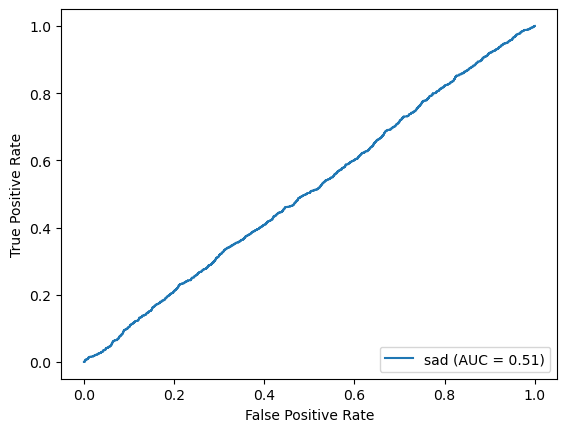

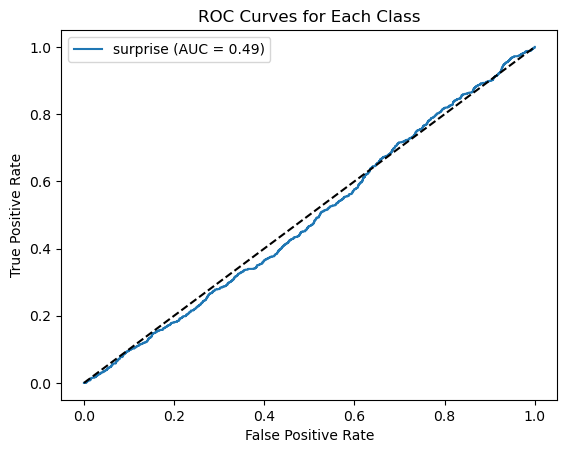

In [12]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import RocCurveDisplay

# Binarize the true labels for ROC curve computation
y_true_bin = label_binarize(y_true, classes=range(len(class_labels)))

# Compute ROC curve and ROC area for each class
n_classes = len(class_labels)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], Y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    RocCurveDisplay(fpr=fpr[i], tpr=tpr[i], roc_auc=roc_auc[i], estimator_name=class_labels[i]).plot()

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class')
plt.legend(loc='best')
plt.show()


<Figure size 1000x800 with 0 Axes>

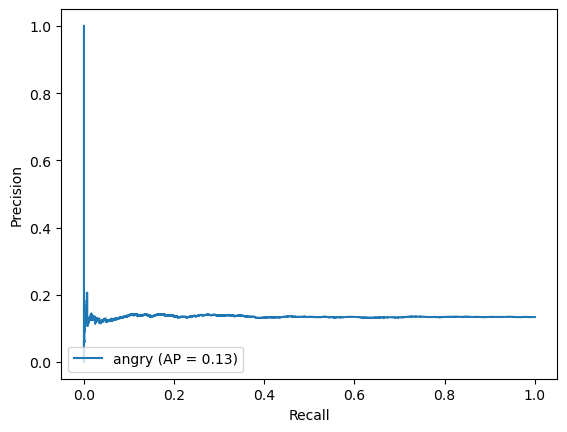

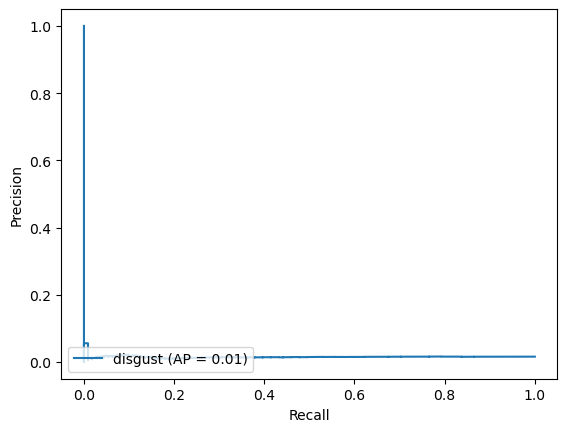

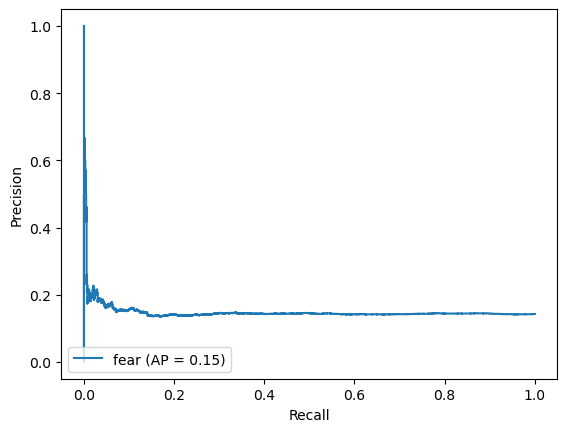

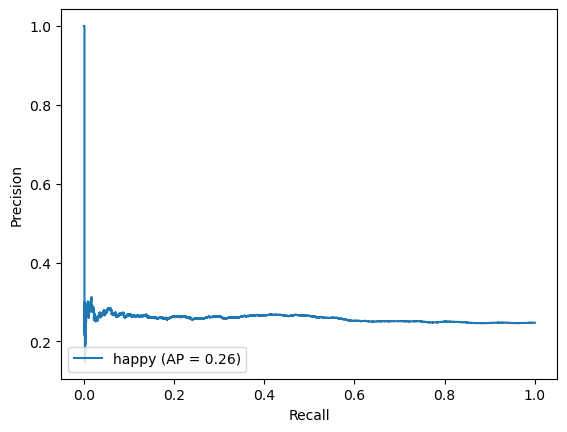

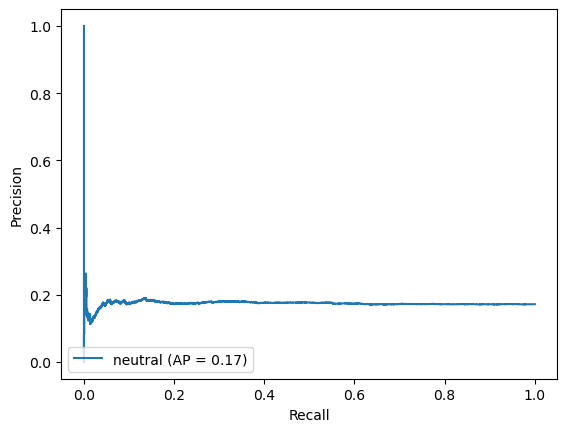

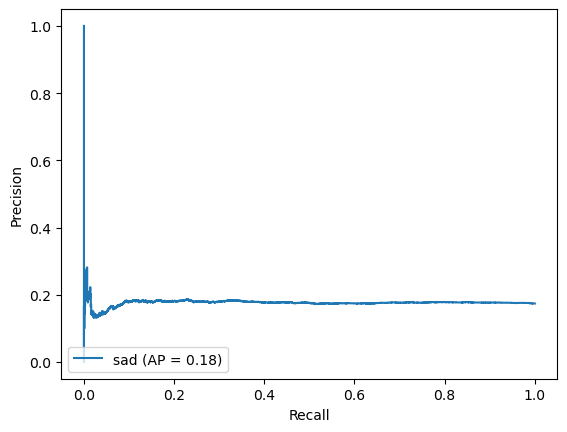

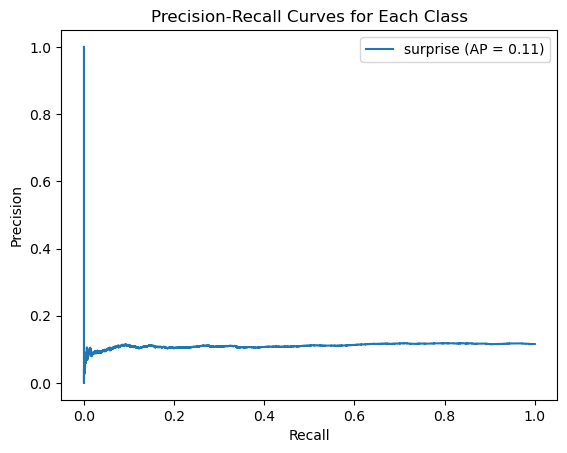

In [13]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

# Compute precision-recall curve for each class
precision = dict()
recall = dict()
prc_auc = dict()

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_true_bin[:, i], Y_pred[:, i])
    prc_auc[i] = auc(recall[i], precision[i])

# Plot Precision-Recall curves for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    PrecisionRecallDisplay(precision=precision[i], recall=recall[i], average_precision=prc_auc[i], estimator_name=class_labels[i]).plot()

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Each Class')
plt.legend(loc='best')
plt.show()


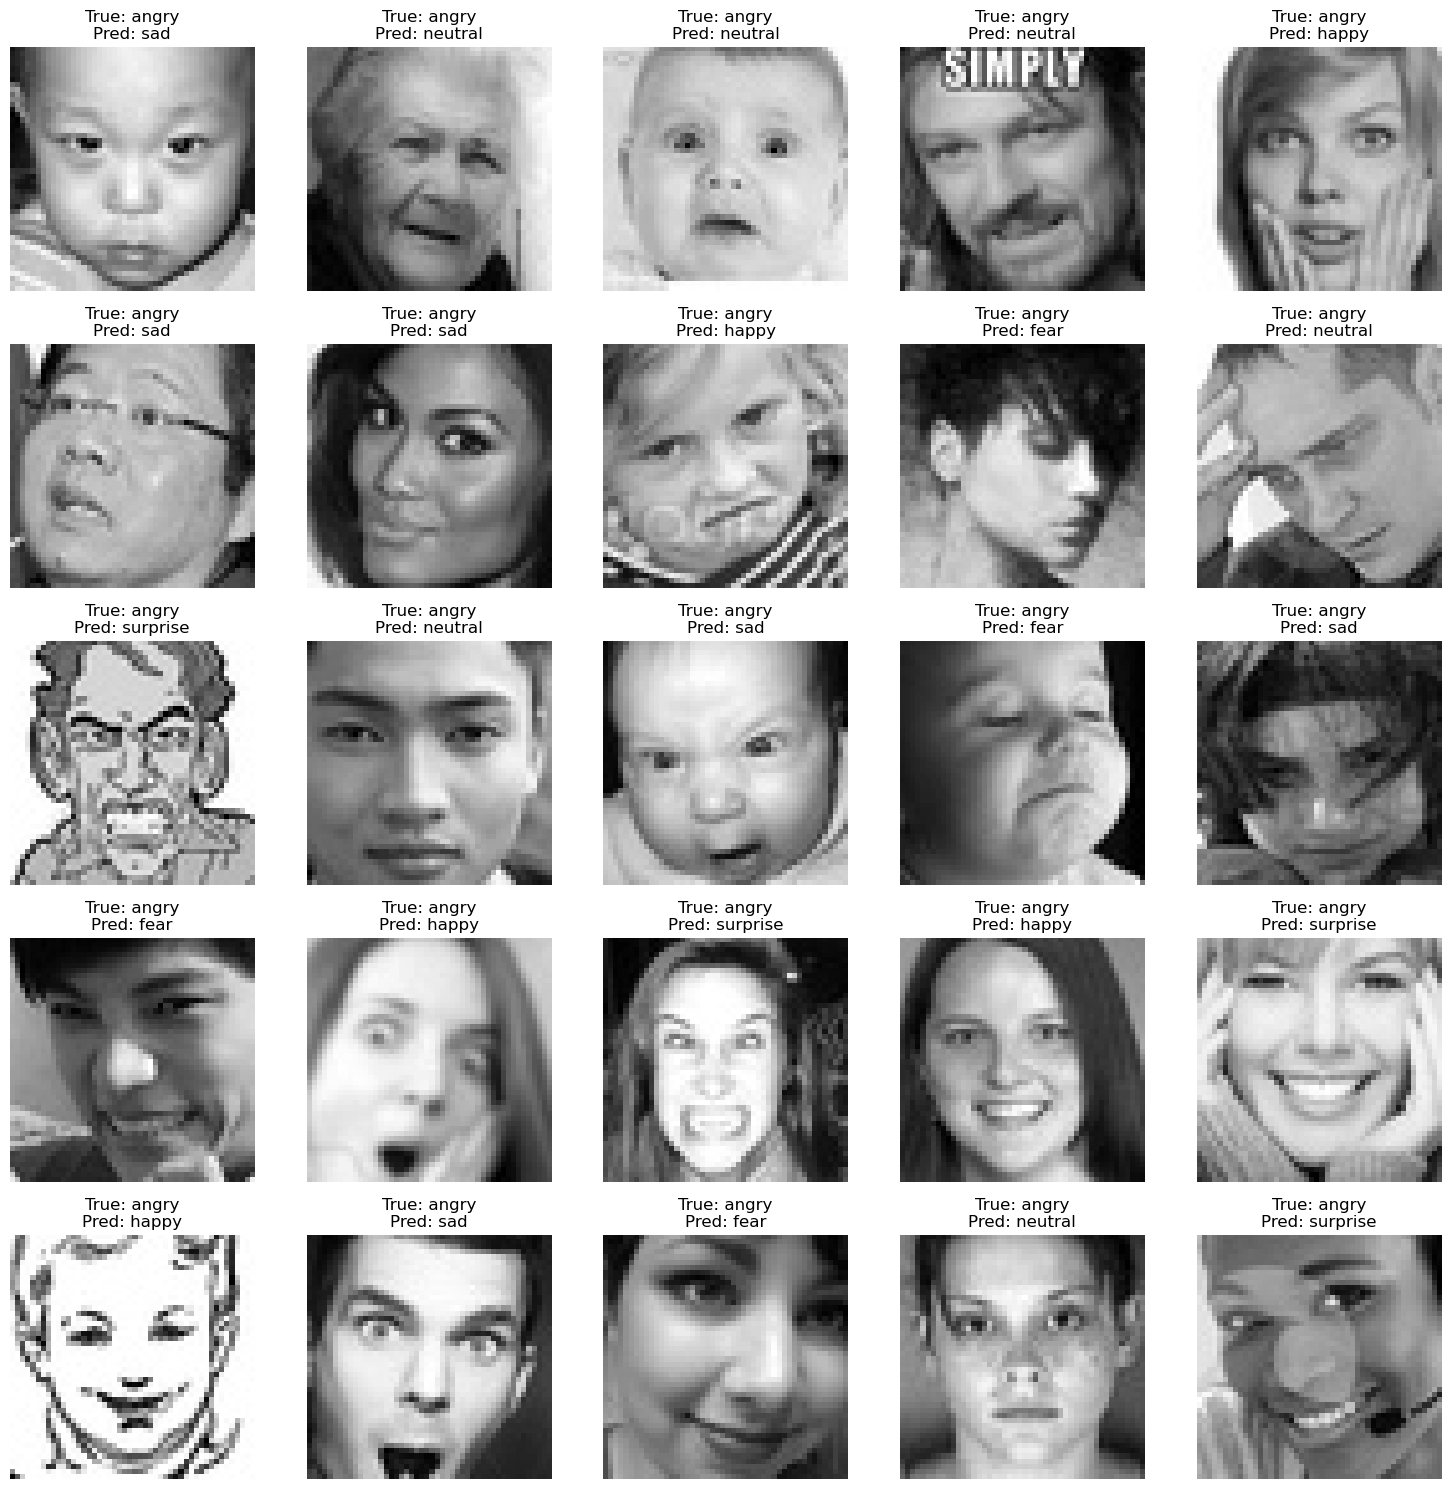

In [14]:
# Get indices of misclassified images
misclassified_indices = np.where(y_true != y_pred)[0]

# Display some misclassified images
plt.figure(figsize=(15, 15))
for i, index in enumerate(misclassified_indices[:25]):
    plt.subplot(5, 5, i + 1)
    
    # Load the image from the validation generator
    img, label = validation_generator[index]
    img = img[0]  # Get the image from the batch
    
    # Reshape the image if necessary
    img = img.reshape(48, 48)  # Remove the channel dimension for grayscale images
    
    plt.imshow(img, cmap='gray')
    plt.title(f'True: {class_labels[y_true[index]]}\nPred: {class_labels[y_pred[index]]}')
    plt.axis('off')
plt.tight_layout()
plt.show()


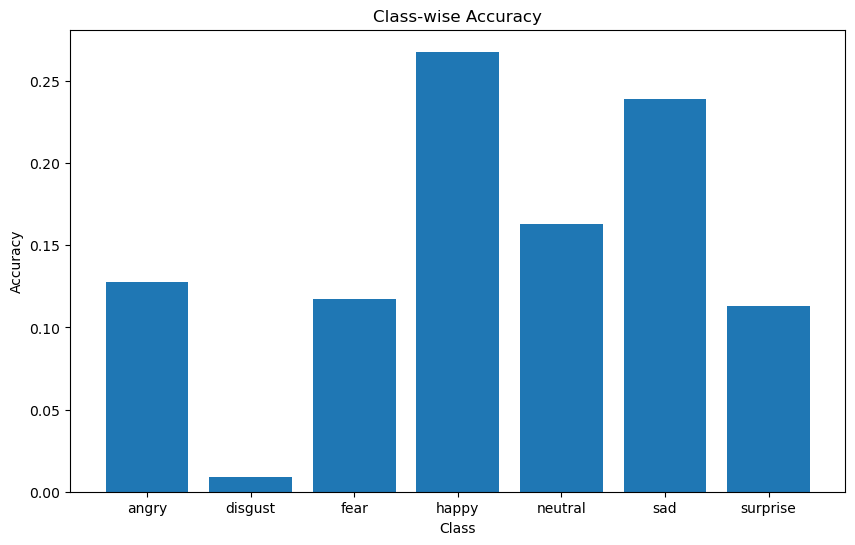

In [15]:
class_accuracies = []
for i, label in enumerate(class_labels):
    class_indices = np.where(y_true == i)[0]
    class_accuracy = np.mean(y_true[class_indices] == y_pred[class_indices])
    class_accuracies.append(class_accuracy)

# Plot class-wise accuracy
plt.figure(figsize=(10, 6))
plt.bar(class_labels, class_accuracies)
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Class-wise Accuracy')
plt.show()
